# Visualize measured climate data and compare to GSWP3 model forcing

In [1]:
import glob
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
# For metadata, see https://fluxnet.org/data/fluxnet2015-dataset/subset-data-product/
measurements_data_fpath = Path().absolute().parents[1] / 'data' / 'sites' \
    / 'hyy' / 'fluxnet2015' / 'FLX_FI-Hyy_FLUXNET2015_SUBSET_DD_1996-2014_1-4.csv'

In [3]:
clim_data_df = pd.read_csv(measurements_data_fpath)
clim_data_df["TIMESTAMP"] = pd.to_datetime(
    clim_data_df["TIMESTAMP"],
    format="%Y%m%d"
)
clim_data_df.head()

,TIMESTAMP,TA_F,TA_F_QC,SW_IN_POT,SW_IN_F,SW_IN_F_QC,LW_IN_F,LW_IN_F_QC,VPD_F,VPD_F_QC,...,RECO_DT_VUT_REF,RECO_DT_VUT_25,RECO_DT_VUT_50,RECO_DT_VUT_75,GPP_DT_VUT_REF,GPP_DT_VUT_25,GPP_DT_VUT_50,GPP_DT_VUT_75,RECO_SR,RECO_SR_N
0,1996-01-01,-6.336,0.0,17.3439,5.648,0.0,247.522,0.0,0.521,0.0,...,2.61684,2.53493,2.54154,2.57867,0.382775,0.381902,0.383629,0.391342,-9999.0,0.0
1,1996-01-02,-5.097,0.0,17.7474,2.201,0.0,286.483,0.0,0.533,0.0,...,2.71976,2.63462,2.64150,2.68008,0.154587,0.154155,0.154675,0.158705,-9999.0,0.0
2,1996-01-03,-7.166,0.0,18.1928,2.528,0.0,268.600,0.0,0.293,0.0,...,2.54820,2.46843,2.47487,2.51102,0.177207,0.176717,0.177324,0.181885,-9999.0,0.0
3,1996-01-04,-13.889,0.0,18.6806,6.159,0.0,214.964,0.0,0.286,0.0,...,1.94274,1.88192,1.88683,1.91439,0.415879,0.414952,0.416876,0.425012,-9999.0,0.0
4,1996-01-05,-9.517,0.0,19.2123,3.048,0.0,260.867,0.0,0.302,0.0,...,2.34379,2.27042,2.27635,2.30960,0.212700,0.212126,0.212888,0.218193,-9999.0,0.0


In [4]:
clm_forcing_data_path = Path().absolute().parents[1] / 'data' / 'case_input_data' \
    / 'HYY' / 'datmdata'

'\nclm_forcing_data_fpaths = glob.glob(f"{clm_forcing_data_path}/*TPQWL*.nc") + glob.glob(f"{clm_forcing_data_path}/*Solr*.nc") + glob.glob(f"{clm_forcing_data_path}/*Prec*.nc")\n\natm_forcing_data = xr.open_mfdataset(\n    clm_forcing_data_fpaths,\n    decode_times=False,\n    parallel=False  # True throws error?\n)\n'

In [5]:
temp_forcing_data = xr.open_mfdataset(
    glob.glob(f"{clm_forcing_data_path}/*TPQWL*.nc"),
    decode_times = True,
    engine='h5netcdf'
)
temp_forcing_data

<xarray.Dataset>
Dimensions:  (time: 332880, lat: 1, lon: 1, scalar: 1)
Coordinates:
  * time     (time) object 1901-01-01 01:30:00 ... 2014-12-31 22:30:00
  * lon      (lon) float32 24.25
  * lat      (lat) float32 61.75
Dimensions without coordinates: scalar
Data variables:
    LONGXY   (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    LATIXY   (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    EDGEE    (time, scalar, lat, lon) float32 dask.array<chunksize=(248, 1, 1, 1), meta=np.ndarray>
    EDGEW    (time, scalar, lat, lon) float32 dask.array<chunksize=(248, 1, 1, 1), meta=np.ndarray>
    EDGES    (time, scalar, lat, lon) float32 dask.array<chunksize=(248, 1, 1, 1), meta=np.ndarray>
    EDGEN    (time, scalar, lat, lon) float32 dask.array<chunksize=(248, 1, 1, 1), meta=np.ndarray>
    PSRF     (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    TBOT     (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    WIND     (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    QBOT     (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    FLDS     (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
Attributes:
    case_title:    GSWP3 3-Hourly Atmospheric Forcing: Temperature, Pressure,...
    Created_on:    2023-04-03
    Created_by:    lassetk
    Created_with:  ./subset_data -- 616905bbb
    Created_from:  /cluster/shared/noresm/inputdata/atm/datm7/atm_forcing.dat...

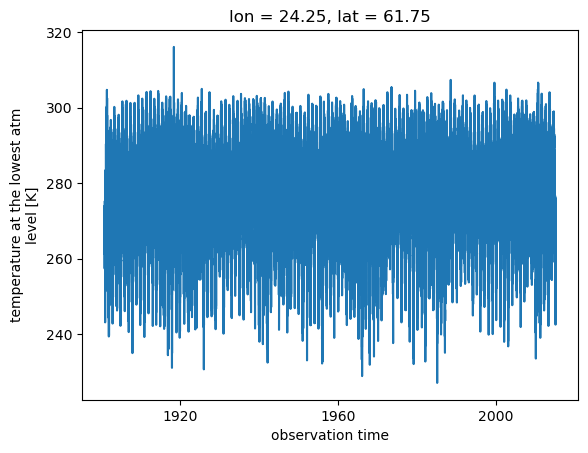

In [6]:
temp_forcing_data["TBOT"].plot()

In [ ]:
precip_forcing_data = xr.open_mfdataset(
    glob.glob(f"{clm_forcing_data_path}/*Prec*.nc")
)

In [ ]:
radiation_forcing_data = xr.open_mfdataset(
    glob.glob(f"{clm_forcing_data_path}/*Solr*.nc")
)

In [ ]:
temp_forcing_data["TBOT"].plot()

In [7]:
# Subset model period
simulation_start_date = "2004-01-01"
simulation_end_date = "2014-01-01"

In [17]:
# Subset measurements
date_mask = (clim_data_df["TIMESTAMP"] >= np.datetime64(simulation_start_date)) & \
    (clim_data_df["TIMESTAMP"] <= np.datetime64(simulation_end_date))

simperiod_clim_data_df = clim_data_df.loc[date_mask]

In [32]:
# Obs. data has leap years, unlike GSWP3 forcing. See:
# _ = [print(x) for x in simperiod_clim_data_df["TIMESTAMP"] if (x.month==2) & (x.day>=28)]
# _ = [print(x) for x in temp_1d_forcing_data["time"].values if (x.month==2) & (x.day>=28)]

# Remove leap years from obs. Get indices first
leap_day_mask = \
    [
        False if (x.month==2) & (x.day==29) else True
        for x in simperiod_clim_data_df["TIMESTAMP"]
    ]
# Subset data
simperiod_noleap_clim_data_df = simperiod_clim_data_df.loc[leap_day_mask]

## Air temperature

In [9]:
# Subset GSWP3 forcing
temp_forcing_data = temp_forcing_data.sel(
    time=slice(simulation_start_date, simulation_end_date)
)

In [11]:
# Daily averages
temp_1d_forcing_data = \
    temp_forcing_data.resample(time='1D').mean('time')

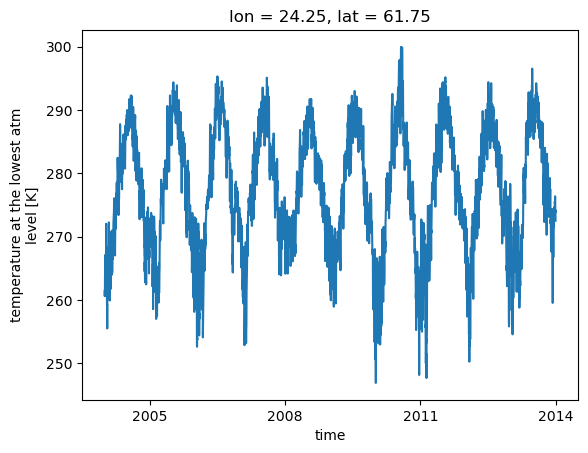

In [12]:
temp_1d_forcing_data["TBOT"].plot()

/tmp/ipykernel_35843/2155825252.py:12: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  temp_1d_forcing_data.indexes["time"].to_datetimeindex(),


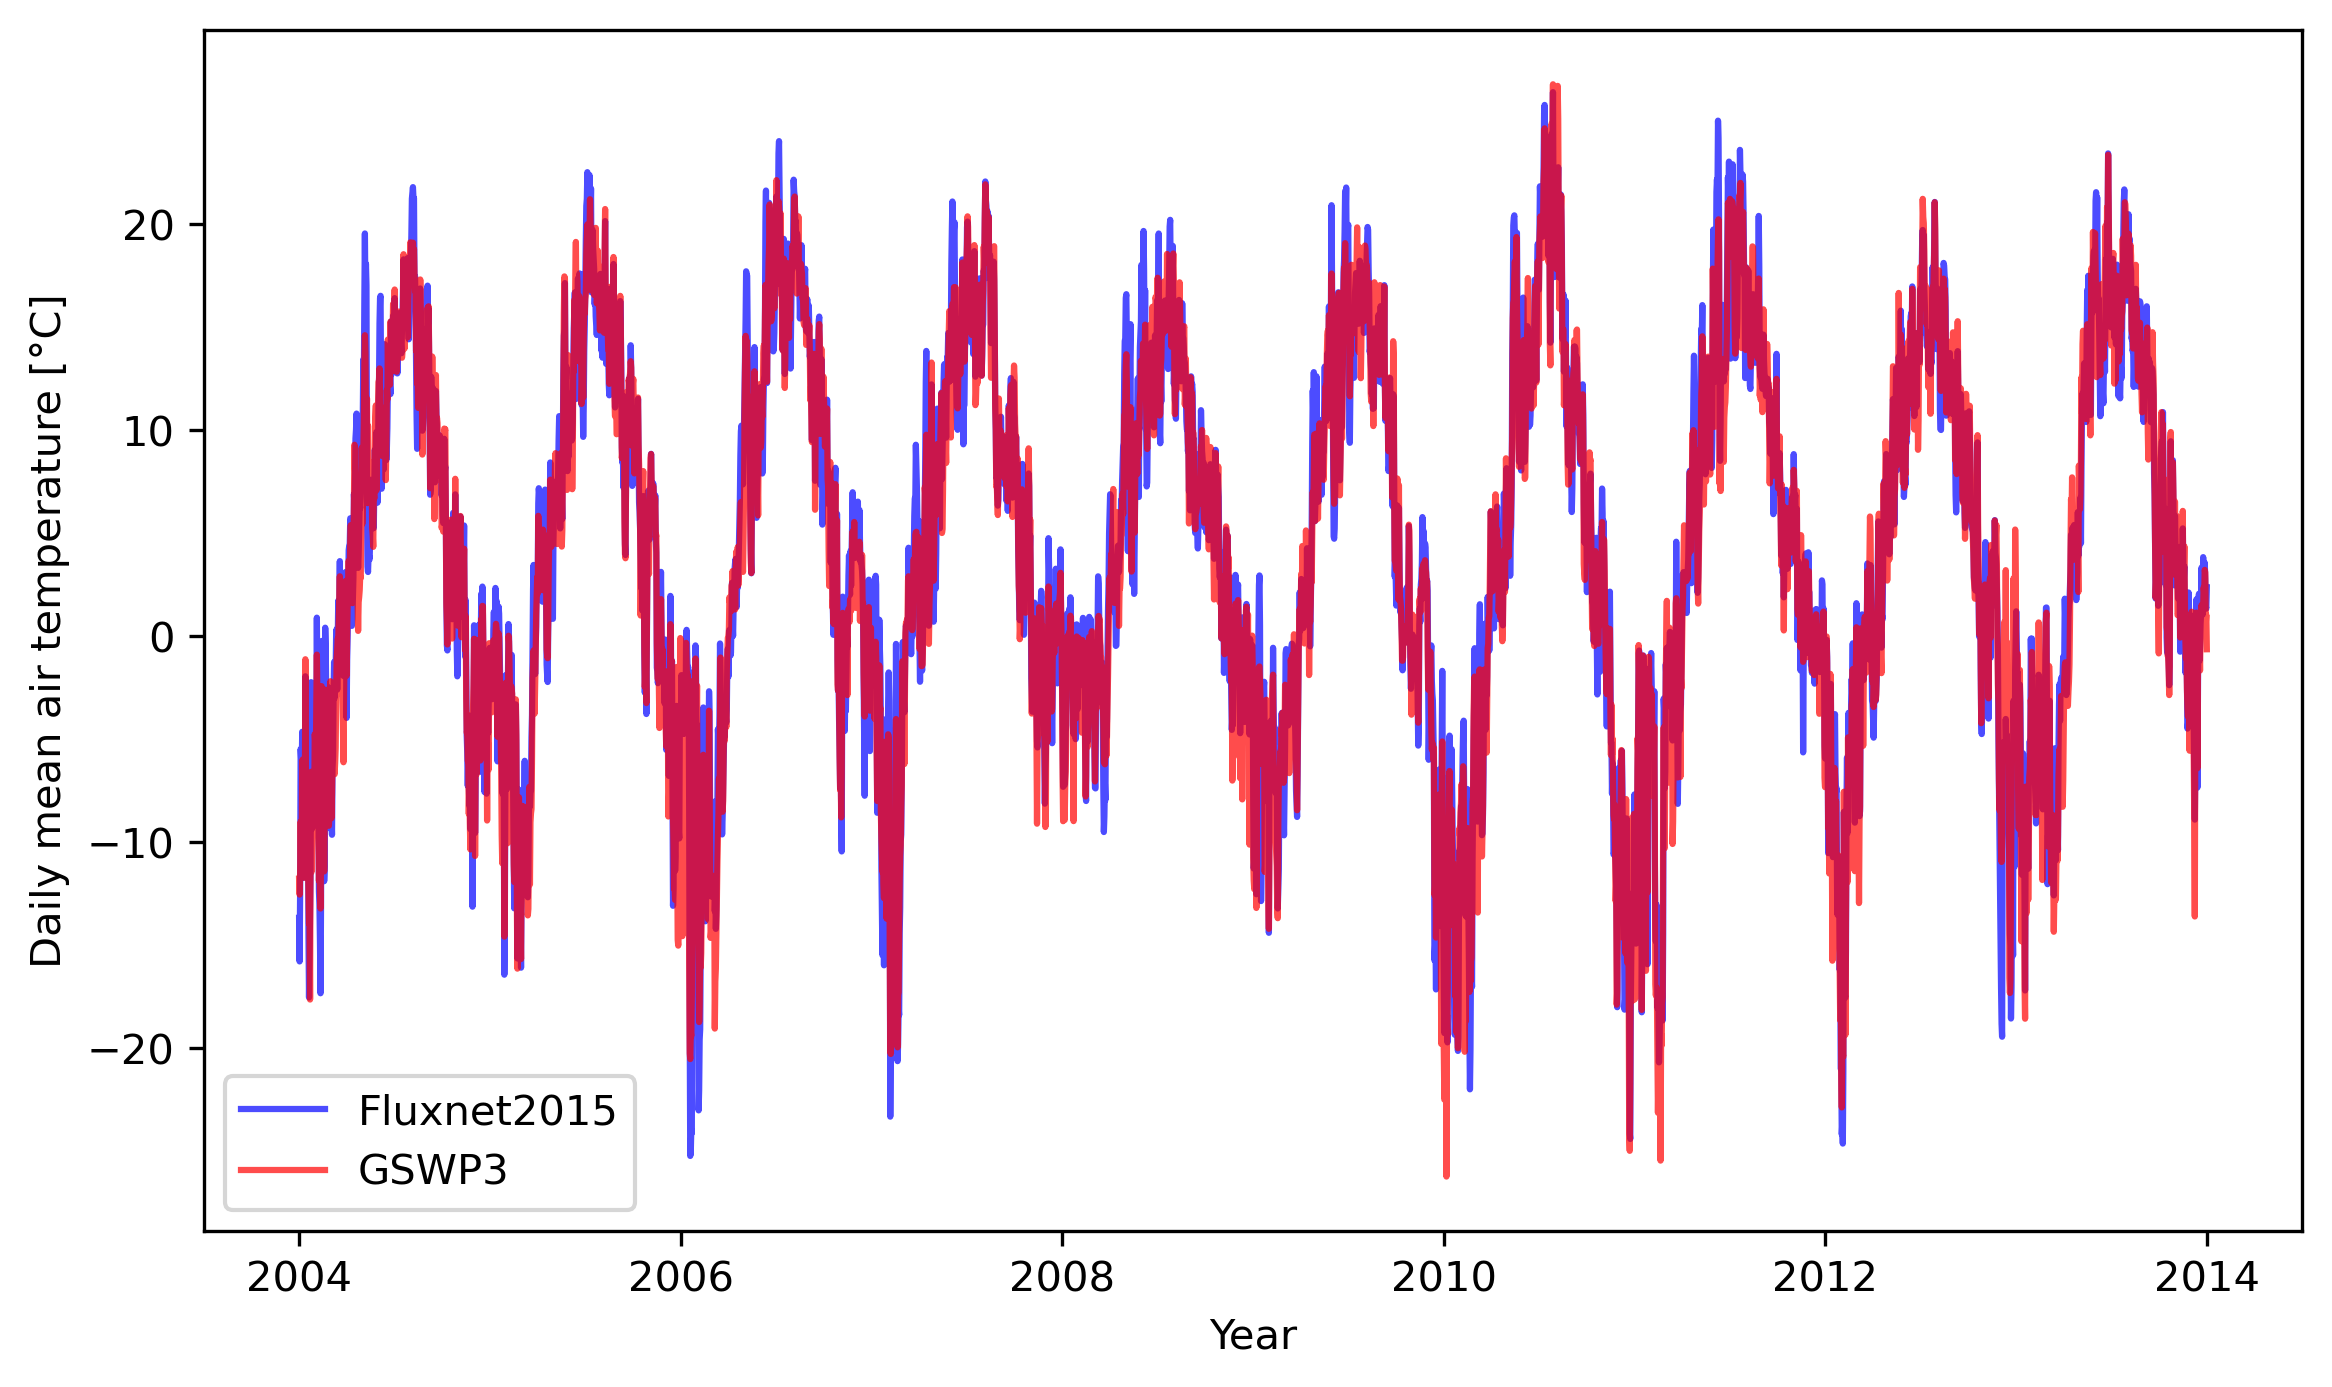

In [68]:
fig, ax = plt.subplots(figsize=(20/2.54, 12/2.54), dpi=300)

ax.plot(
    simperiod_noleap_clim_data_df["TIMESTAMP"],
    simperiod_noleap_clim_data_df["TA_F"],
    color="blue",
    alpha=0.7,
    label="Fluxnet2015"
)

ax.plot(
    temp_1d_forcing_data.indexes["time"].to_datetimeindex(),
    temp_1d_forcing_data["TBOT"].values.flatten() - 273.15,
    color="red",
    alpha=0.7,
    label="GSWP3"
)

ax.set_ylabel("Daily mean air temperature [°C]")
ax.set_xlabel("Year")
ax.legend()

fig.tight_layout()
fig.savefig("../../data/results/obs_data_visualization/HYY_air_temp.png")

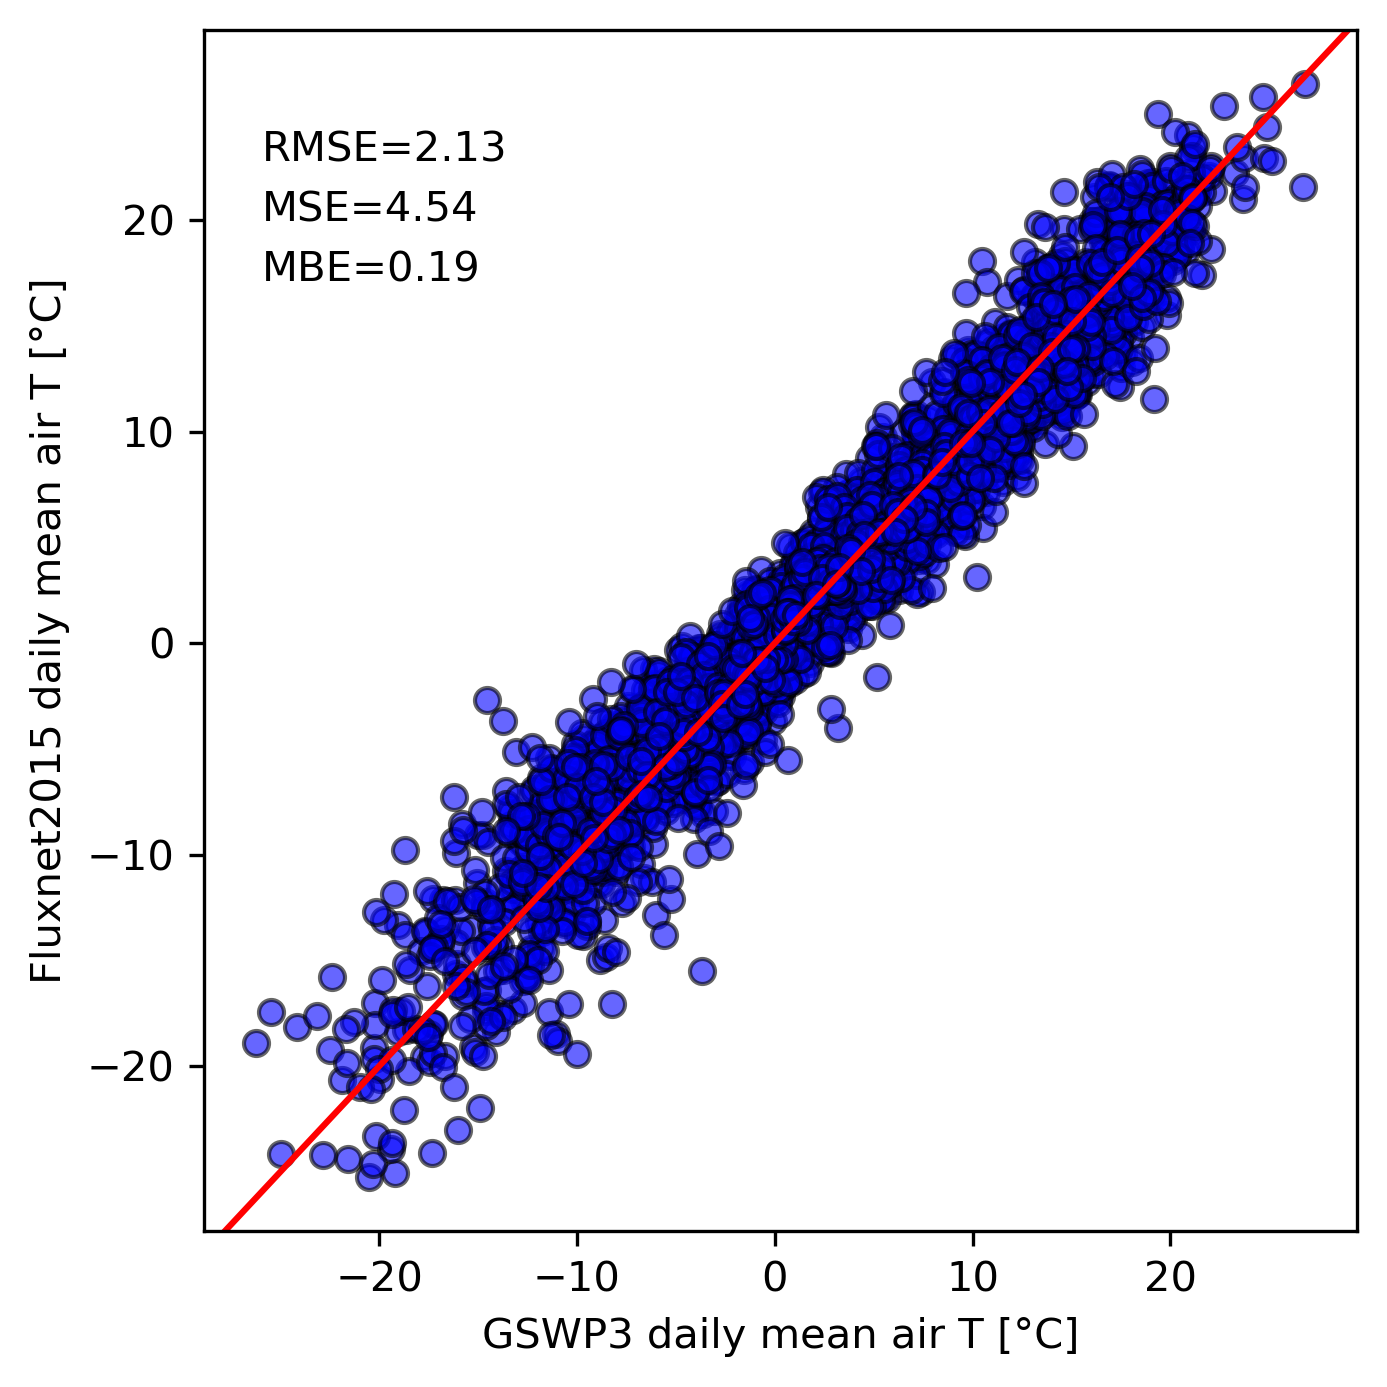

In [65]:
# Calculate error metrics
gswp3 = temp_1d_forcing_data["TBOT"].values.flatten() - 273.15
fluxnet = simperiod_noleap_clim_data_df["TA_F"]

rmse = np.sqrt(np.mean((fluxnet - gswp3)**2))
mse = np.mean((fluxnet - gswp3)**2)
mbe = np.mean(fluxnet - gswp3)

# Plot GSWP3 vs. Fluxnet2015
fig, ax = plt.subplots(figsize=(12/2.54, 12/2.54), dpi=300)

ax.scatter(
    temp_1d_forcing_data["TBOT"].values.flatten() - 273.15,
    simperiod_noleap_clim_data_df["TA_F"],
    c="blue",
    edgecolors="black",
    alpha=0.6
)

# Add 1:1 line
ax.axline((0, 0), slope=1, color="red")

ax.text(
    0.05, 0.9,
    s=f"RMSE={np.round(rmse, 2)}",
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax.transAxes
)
ax.text(
    0.05, 0.85,
    s=f"MSE={np.round(mse, 2)}",
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax.transAxes
)
ax.text(
    0.05, 0.8,
    s=f"MBE={np.round(mbe, 2)}",
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax.transAxes
)

ax.set_ylabel("Fluxnet2015 daily mean air T [°C]")
ax.set_xlabel("GSWP3 daily mean air T [°C]")

fig.tight_layout()
fig.savefig("../../data/results/obs_data_visualization/HYY_air_temp_1to1.png")

---
## Precipitation

In [69]:
precip_forcing_data = xr.open_mfdataset(
    glob.glob(f"{clm_forcing_data_path}/*Prec*.nc")
)

In [70]:
# Subset GSWP3 forcing
precip_forcing_data = precip_forcing_data.sel(
    time=slice(simulation_start_date, simulation_end_date)
)

In [72]:
# Daily averages
precip_1d_forcing_data = \
    precip_forcing_data.resample(time='1D').sum()

In [74]:
precip_1d_forcing_data["PRECTmms"].values.flatten()

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       6.11856740e-05, 1.85068086e-04, 1.13774295e-04], dtype=float32)

/tmp/ipykernel_35843/106247627.py:12: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  precip_1d_forcing_data.indexes["time"].to_datetimeindex(),


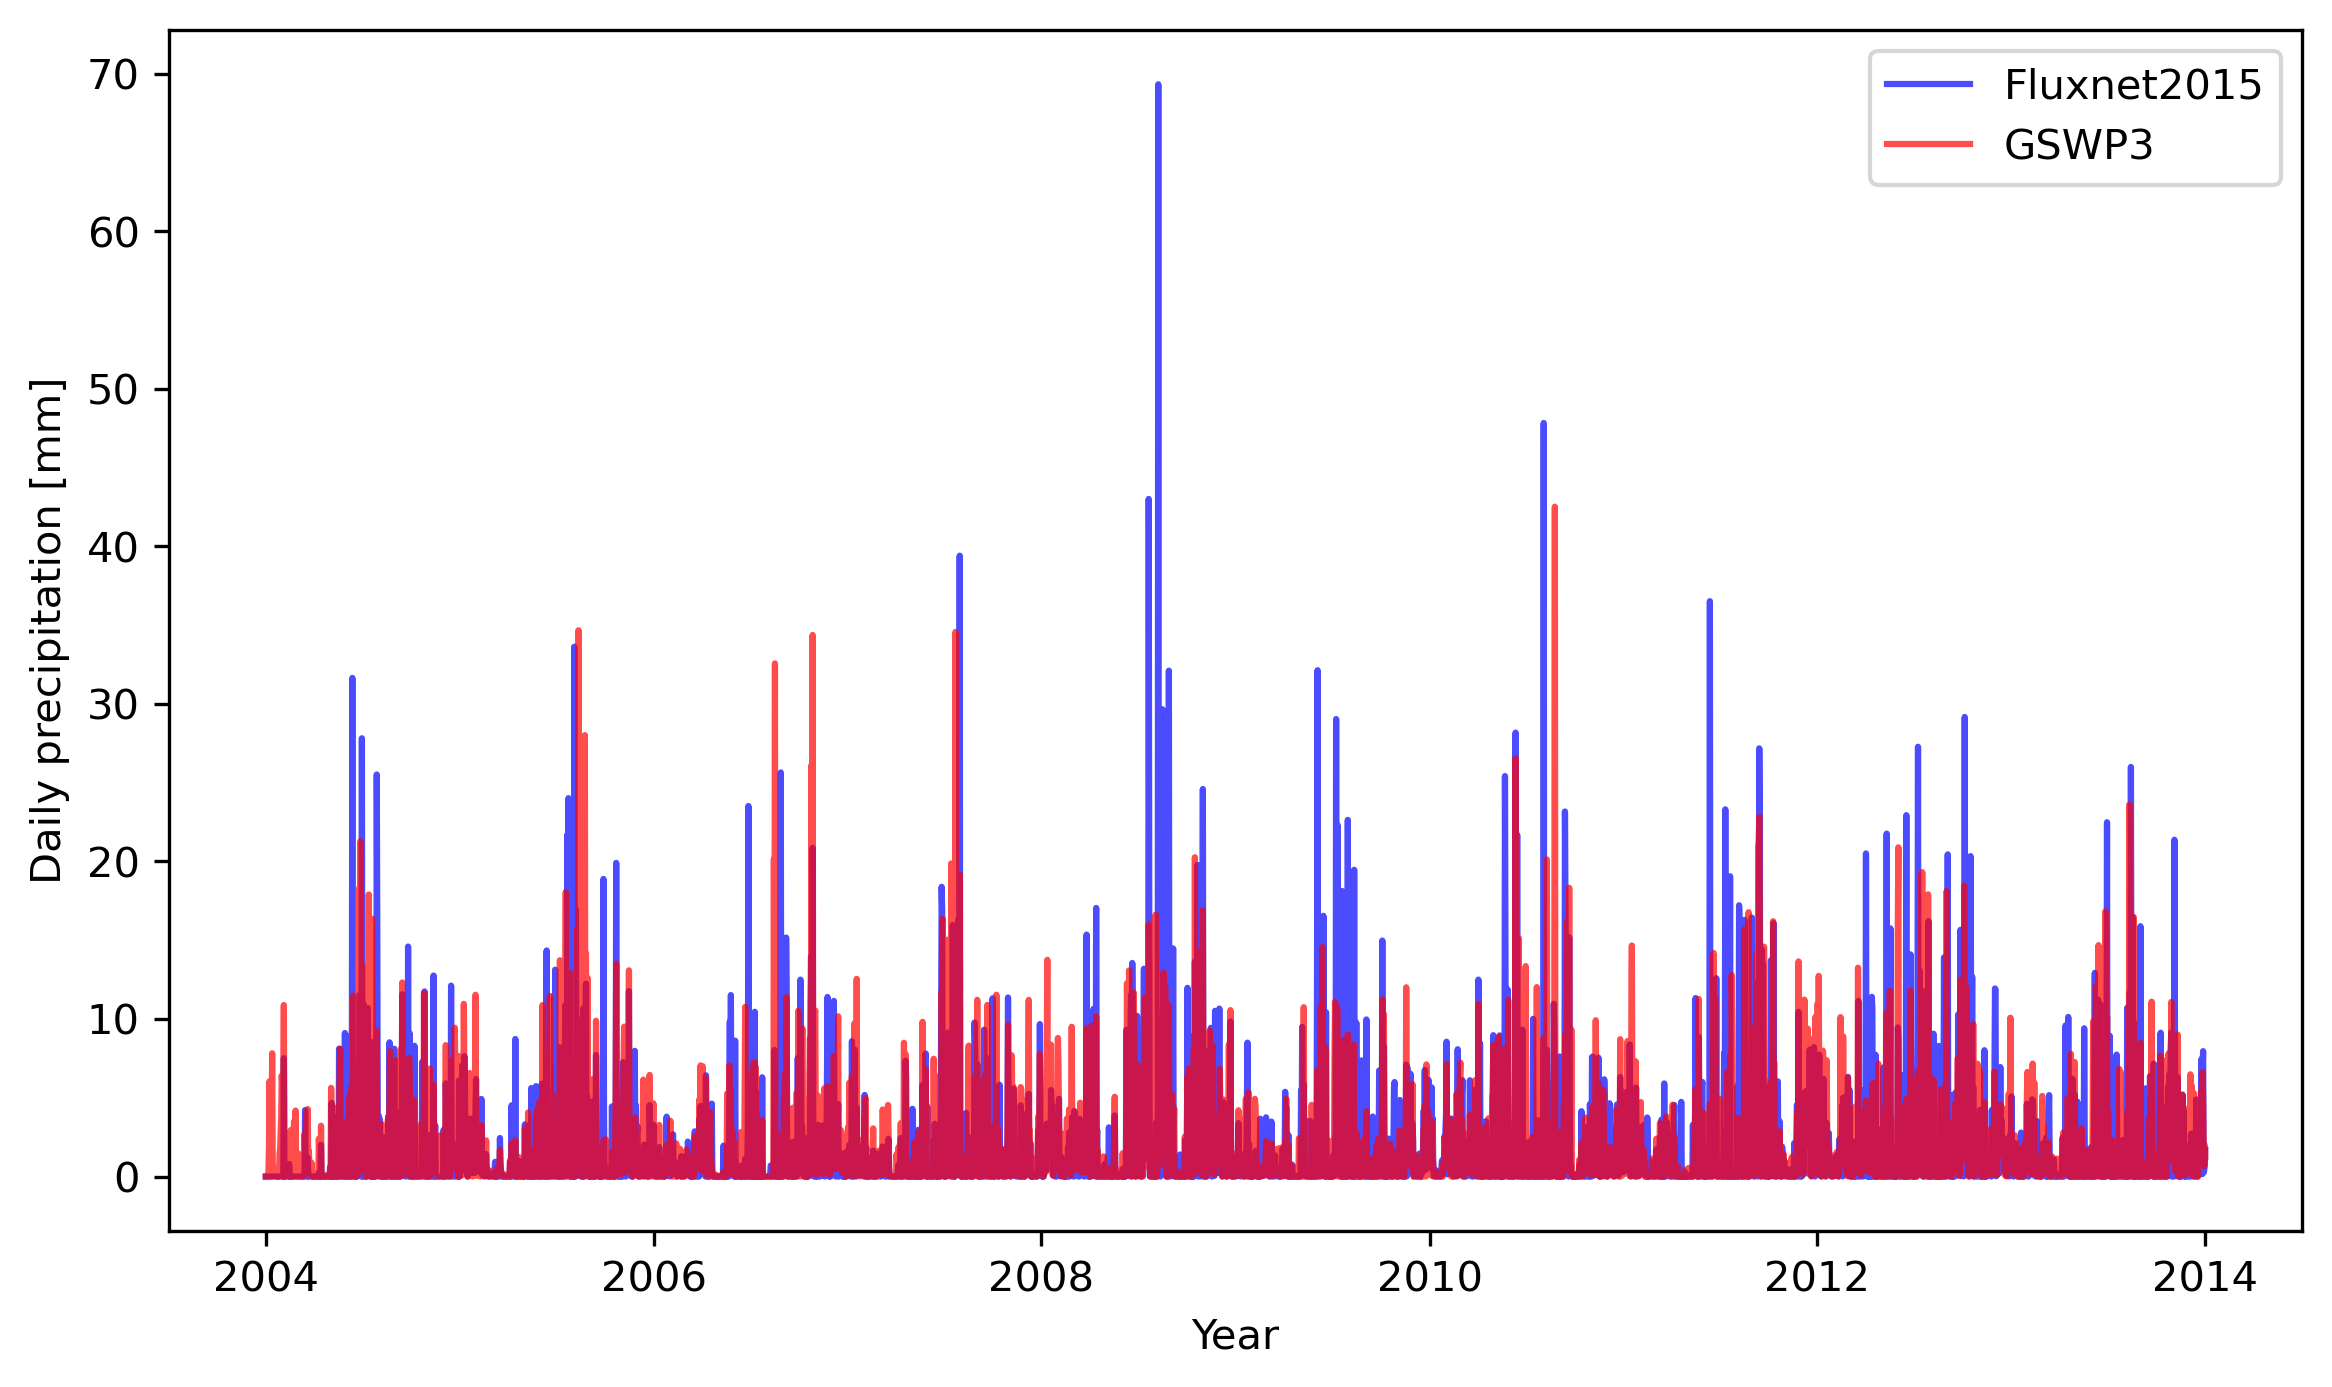

In [75]:
fig, ax = plt.subplots(figsize=(20/2.54, 12/2.54), dpi=300)

ax.plot(
    simperiod_noleap_clim_data_df["TIMESTAMP"],
    simperiod_noleap_clim_data_df["P_F"],
    color="blue",
    alpha=0.7,
    label="Fluxnet2015"
)

# Convert GSWP3 from [mm H2O / sec] to total (3h=10800s model time step)
ax.plot(
    precip_1d_forcing_data.indexes["time"].to_datetimeindex(),
    precip_1d_forcing_data["PRECTmms"].values.flatten() * 10800,
    color="red",
    alpha=0.7,
    label="GSWP3"
)

ax.set_ylabel("Daily precipitation [mm]")
ax.set_xlabel("Year")
ax.legend()

fig.tight_layout()
fig.savefig("../../data/results/obs_data_visualization/HYY_daily_precip.png")

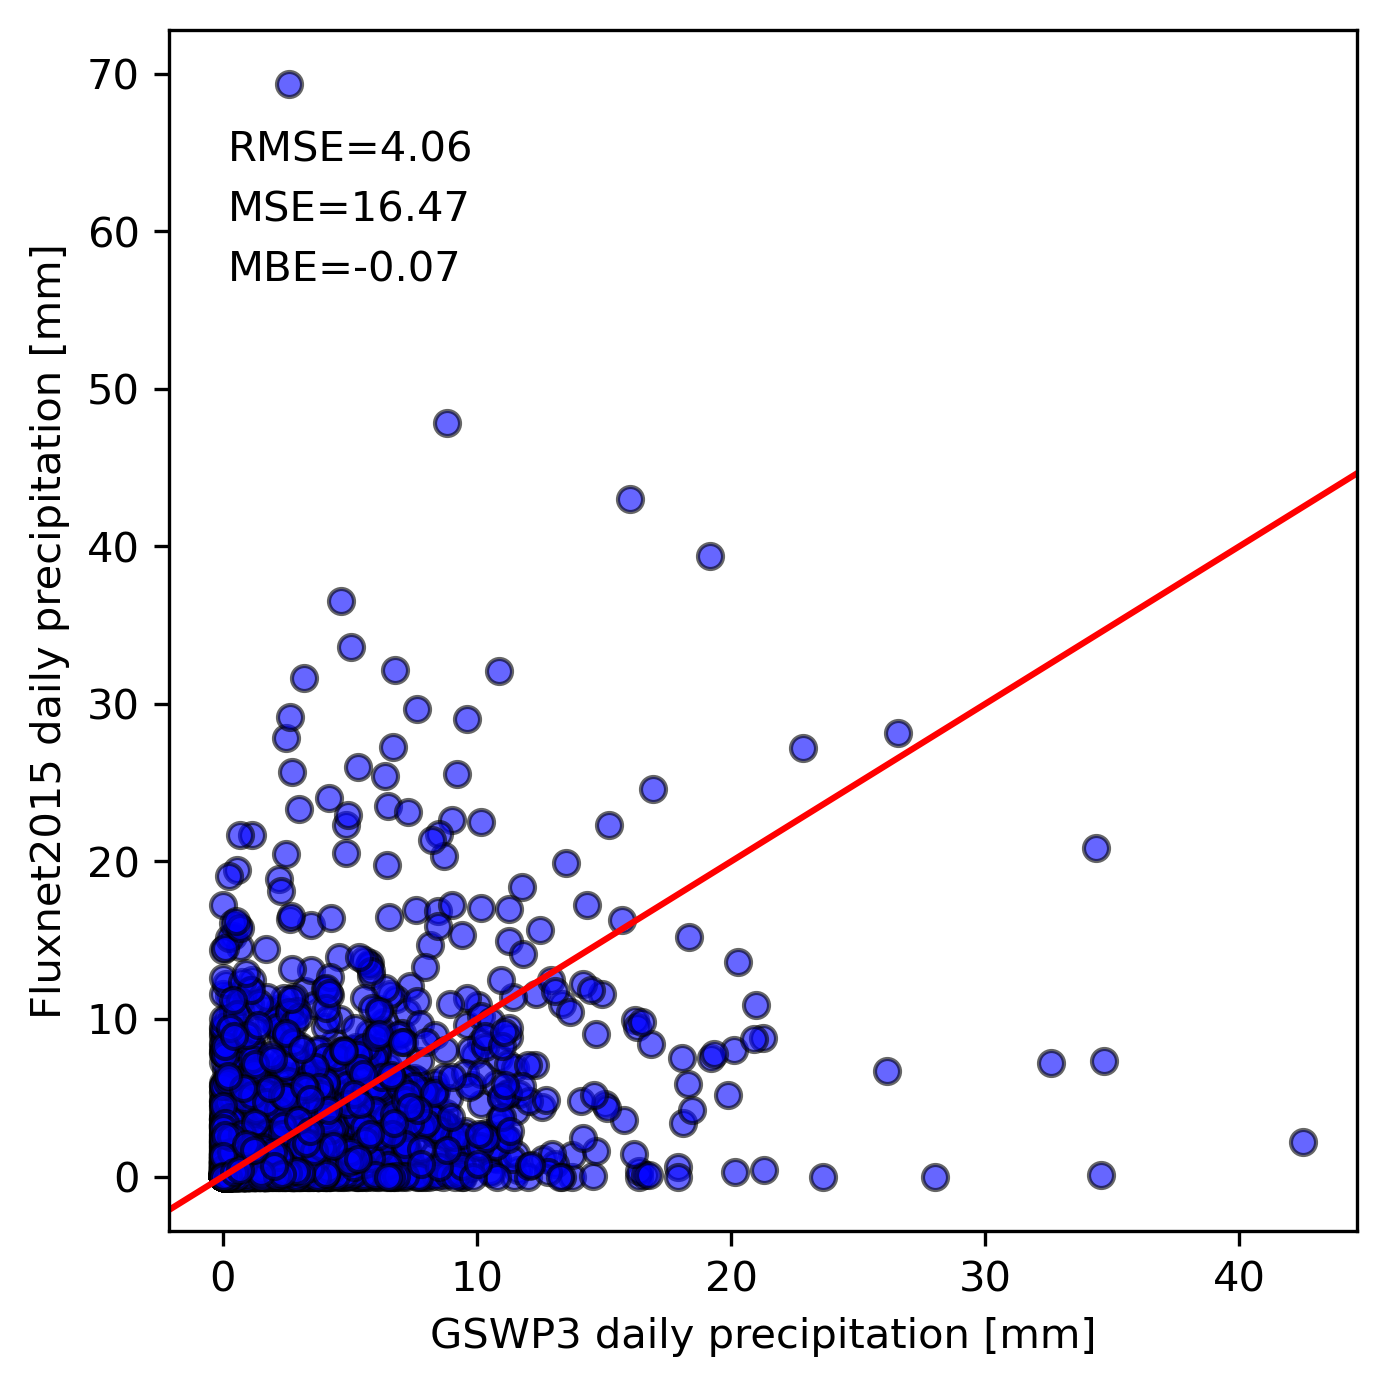

In [76]:
# Calculate error metrics
gswp3 = precip_1d_forcing_data["PRECTmms"].values.flatten() * 10800
fluxnet = simperiod_noleap_clim_data_df["P_F"]

rmse = np.sqrt(np.mean((fluxnet - gswp3)**2))
mse = np.mean((fluxnet - gswp3)**2)
mbe = np.mean(fluxnet - gswp3)

# Plot GSWP3 vs. Fluxnet2015
fig, ax = plt.subplots(figsize=(12/2.54, 12/2.54), dpi=300)

ax.scatter(
    gswp3,
    fluxnet,
    c="blue",
    edgecolors="black",
    alpha=0.6
)

# Add 1:1 line
ax.axline((0, 0), slope=1, color="red")

ax.text(
    0.05, 0.9,
    s=f"RMSE={np.round(rmse, 2)}",
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax.transAxes
)
ax.text(
    0.05, 0.85,
    s=f"MSE={np.round(mse, 2)}",
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax.transAxes
)
ax.text(
    0.05, 0.8,
    s=f"MBE={np.round(mbe, 2)}",
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax.transAxes
)

ax.set_ylabel("Fluxnet2015 daily precipitation [mm]")
ax.set_xlabel("GSWP3 daily precipitation [mm]")

fig.tight_layout()
fig.savefig("../../data/results/obs_data_visualization/HYY_daily_precip_1to1.png")

---
## Radiation

In [80]:
radiation_forcing_data = xr.open_mfdataset(
    glob.glob(f"{clm_forcing_data_path}/*Solr*.nc")
)

In [81]:
# Subset GSWP3 forcing
radiation_forcing_data = radiation_forcing_data.sel(
    time=slice(simulation_start_date, simulation_end_date)
)

In [107]:
radiation_forcing_data

<xarray.Dataset>
Dimensions:  (time: 3651, lat: 1, lon: 1, scalar: 1)
Coordinates:
  * lon      (lon) float32 24.25
  * lat      (lat) float32 61.75
  * time     (time) object 2004-01-01 00:00:00 ... 2014-01-01 00:00:00
Dimensions without coordinates: scalar
Data variables:
    LONGXY   (time, lat, lon) float32 dask.array<chunksize=(31, 1, 1), meta=np.ndarray>
    LATIXY   (time, lat, lon) float32 dask.array<chunksize=(31, 1, 1), meta=np.ndarray>
    EDGEE    (time, scalar, lat, lon) float32 dask.array<chunksize=(31, 1, 1, 1), meta=np.ndarray>
    EDGEW    (time, scalar, lat, lon) float32 dask.array<chunksize=(31, 1, 1, 1), meta=np.ndarray>
    EDGES    (time, scalar, lat, lon) float32 dask.array<chunksize=(31, 1, 1, 1), meta=np.ndarray>
    EDGEN    (time, scalar, lat, lon) float32 dask.array<chunksize=(31, 1, 1, 1), meta=np.ndarray>
    PSRF     (time, lat, lon) float32 dask.array<chunksize=(31, 1, 1), meta=np.ndarray>
    TBOT     (time, lat, lon) float32 dask.array<chunksize=(31, 1, 1), meta=np.ndarray>
    WIND     (time, lat, lon) float32 dask.array<chunksize=(31, 1, 1), meta=np.ndarray>
    QBOT     (time, lat, lon) float32 dask.array<chunksize=(31, 1, 1), meta=np.ndarray>
    FLDS     (time, lat, lon) float32 dask.array<chunksize=(31, 1, 1), meta=np.ndarray>
Attributes:
    case_title:    GSWP3 3-Hourly Atmospheric Forcing: Temperature, Pressure,...
    Created_on:    2023-04-03
    Created_by:    lassetk
    Created_with:  ./subset_data -- 616905bbb
    Created_from:  /cluster/shared/noresm/inputdata/atm/datm7/atm_forcing.dat...

In [83]:
# Daily averages
radiation_1d_forcing_data = \
    radiation_forcing_data.resample(time='1D').mean()

In [110]:
# Calculate total incoming from SW_IN_F, LW_IN_F, SW_DIF (?)
print(simperiod_noleap_clim_data_df["SW_IN_F"]) # Shortwave in

2922    10.741
2923    11.195
2924    17.229
2925     1.196
2926     4.133
         ...  
6571     0.691
6572     2.505
6573     2.655
6574     2.498
6575     2.841
Name: SW_IN_F, Length: 3651, dtype: float64
2922       4.142708
2923       4.656667
2924       6.060208
2925       0.639375
2926       1.941667
           ...     
6571   -9999.000000
6572   -9999.000000
6573   -9999.000000
6574   -9999.000000
6575   -9999.000000
Name: SW_DIF, Length: 3651, dtype: float64
2922    200.569
2923    191.702
2924    220.632
2925    293.402
2926    283.796
         ...   
6571    327.912
6572    314.588
6573    309.975
6574    312.240
6575    317.958
Name: LW_IN_F, Length: 3651, dtype: float64


/tmp/ipykernel_35843/3814897511.py:14: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  radiation_1d_forcing_data.indexes["time"].to_datetimeindex()[~rad_na_mask.reset_index(drop=True)],


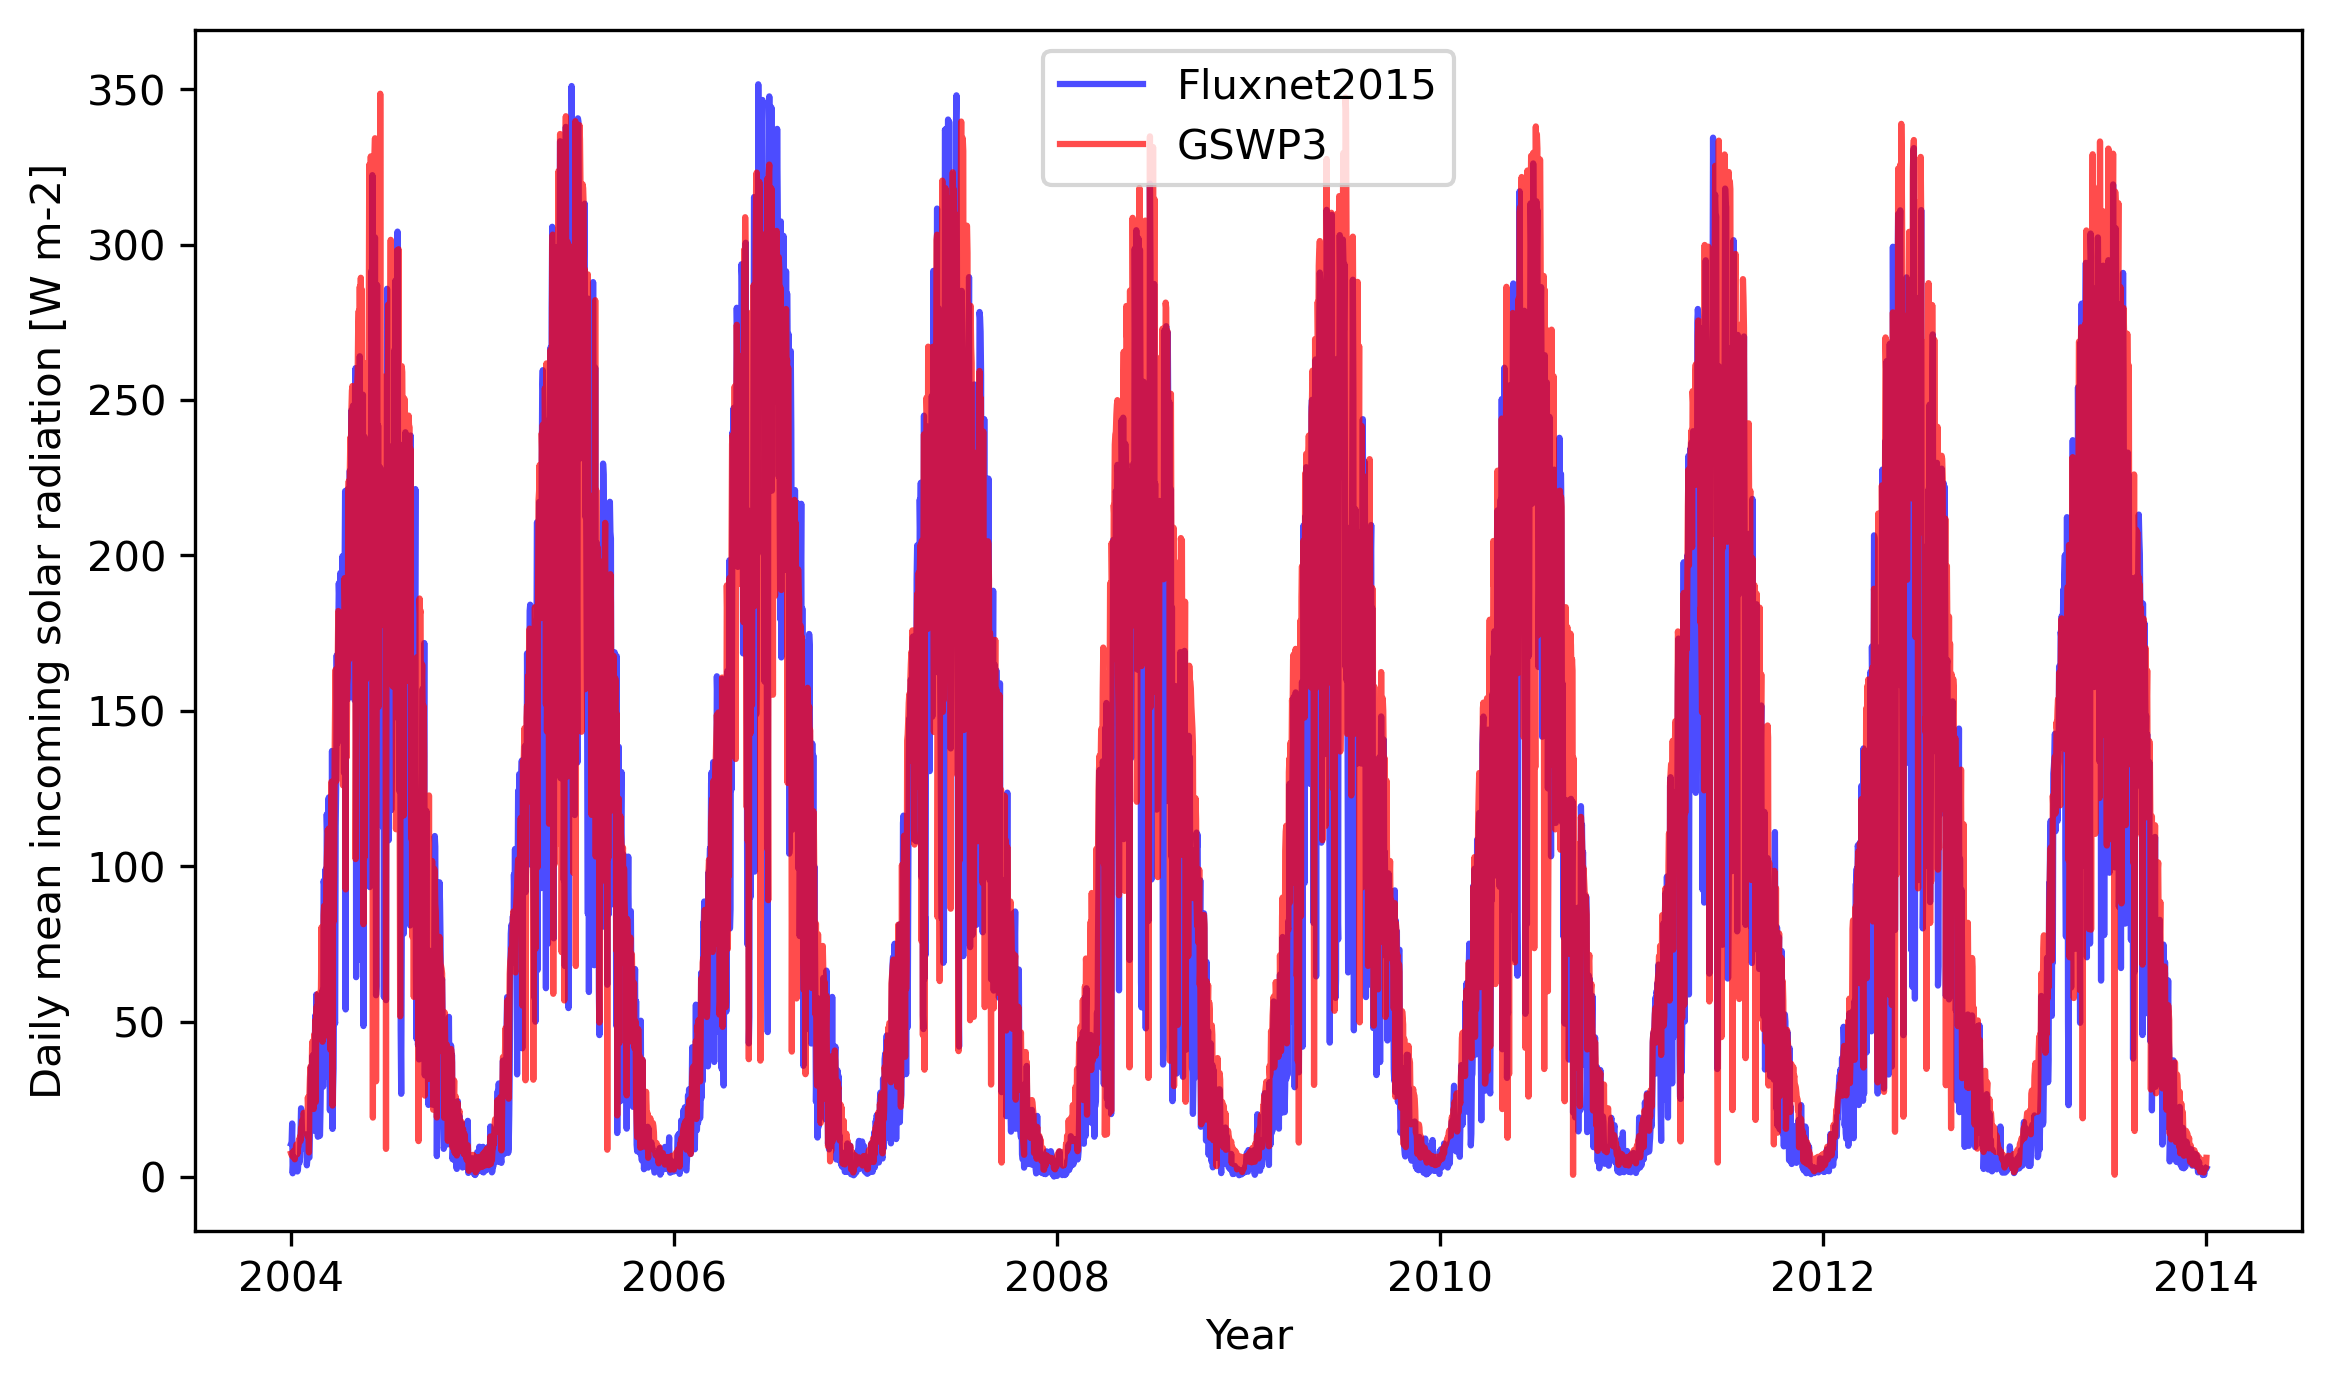

In [112]:
fig, ax = plt.subplots(figsize=(20/2.54, 12/2.54), dpi=300)

rad_na_mask = (simperiod_noleap_clim_data_df["SW_IN_F"] == -9999)

ax.plot(
    simperiod_noleap_clim_data_df["TIMESTAMP"].loc[~rad_na_mask],
    simperiod_noleap_clim_data_df["SW_IN_F"].loc[~rad_na_mask],
    color="blue",
    alpha=0.7,
    label="Fluxnet2015"
)

ax.plot(
    radiation_1d_forcing_data.indexes["time"].to_datetimeindex()[~rad_na_mask.reset_index(drop=True)],
    pd.DataFrame(
        columns=["FSDS"],
        data=radiation_1d_forcing_data["FSDS"].values.flatten()
    ).loc[~rad_na_mask.reset_index(drop=True)],
    color="red",
    alpha=0.7,
    label="GSWP3"
)

ax.set_ylabel("Daily mean incoming solar radiation [W m-2]")
ax.set_xlabel("Year")
ax.legend()

fig.tight_layout()
fig.savefig("../../data/results/obs_data_visualization/HYY_daily_mean_swrad_in.png")

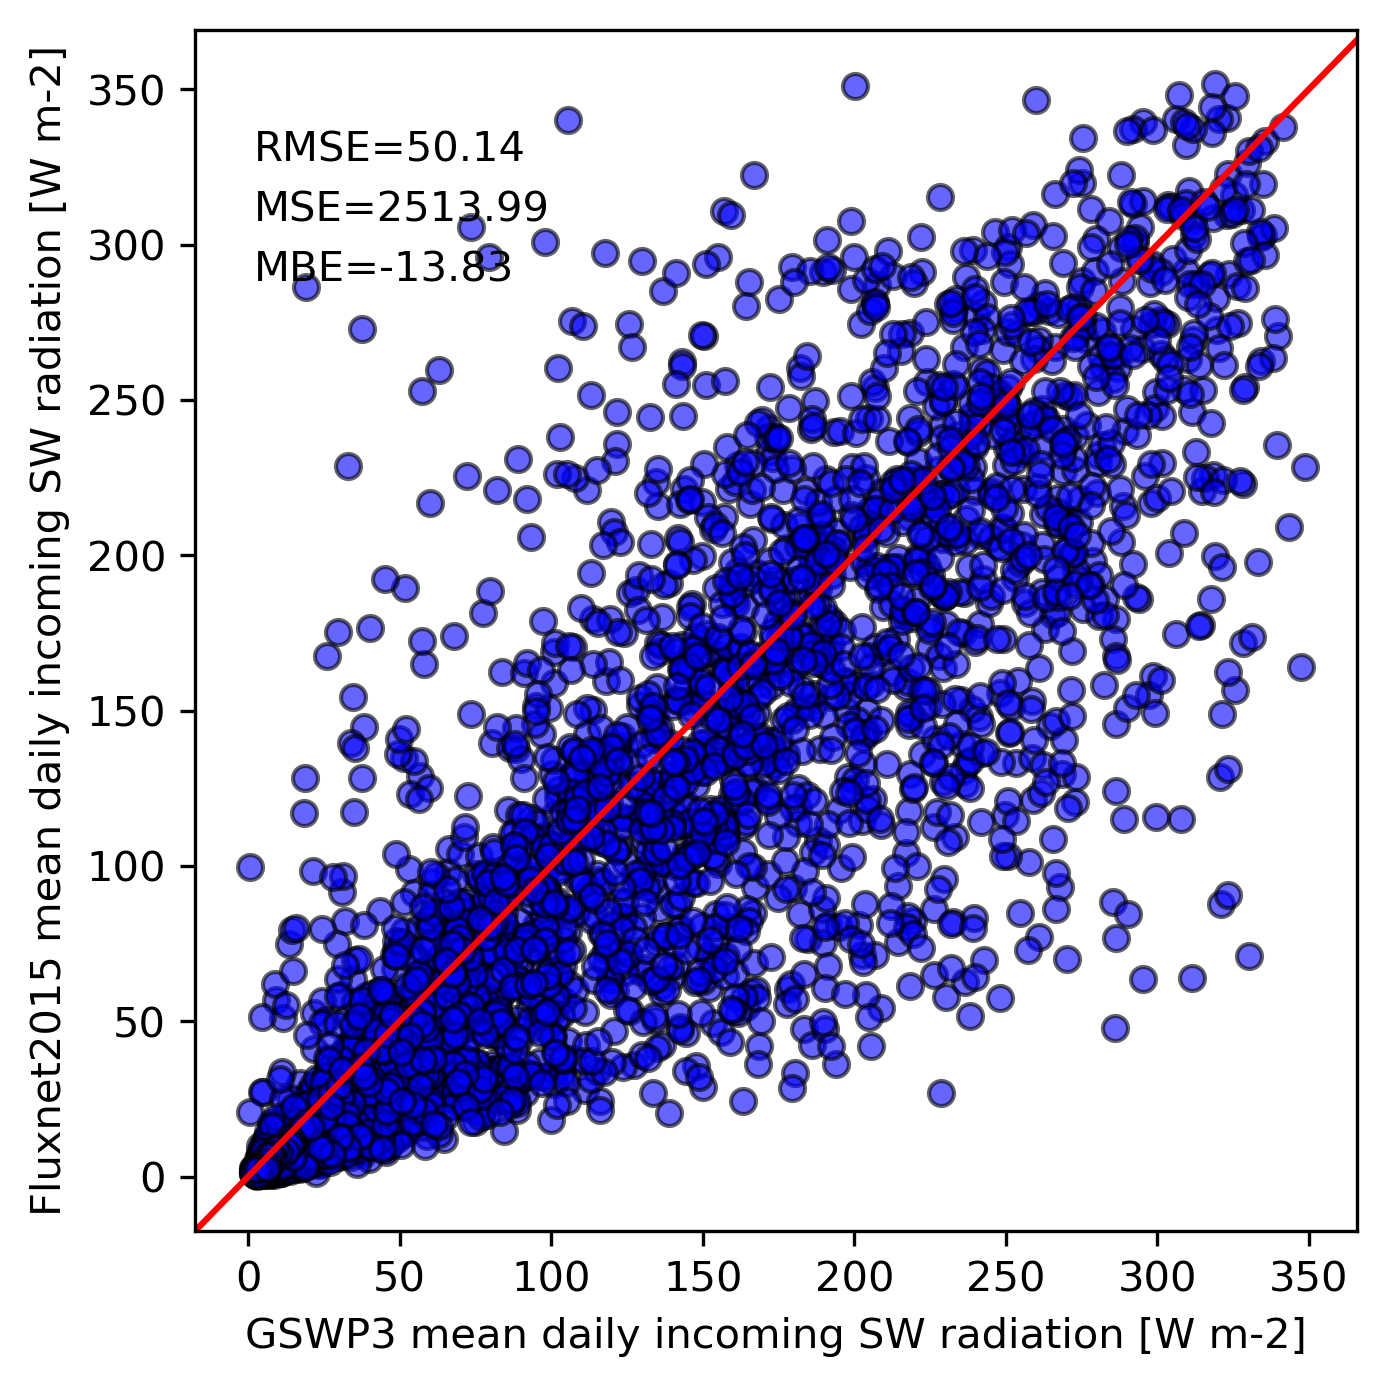

In [115]:
# Calculate error metrics
gswp3 = np.asarray(pd.DataFrame(
        columns=["FSDS"],
        data=radiation_1d_forcing_data["FSDS"].values.flatten()
    ).loc[~rad_na_mask.reset_index(drop=True)]).flatten()
fluxnet = simperiod_noleap_clim_data_df["SW_IN_F"].loc[~rad_na_mask]

rmse = np.sqrt(np.mean((fluxnet - gswp3)**2))
mse = np.mean((fluxnet - gswp3)**2)
mbe = np.mean(fluxnet - gswp3)

# Plot GSWP3 vs. Fluxnet2015
fig, ax = plt.subplots(figsize=(12/2.54, 12/2.54), dpi=300)

ax.scatter(
    gswp3,
    fluxnet,
    c="blue",
    edgecolors="black",
    alpha=0.6
)

# Add 1:1 line
ax.axline((0, 0), slope=1, color="red")

ax.text(
    0.05, 0.9,
    s=f"RMSE={np.round(rmse, 2)}",
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax.transAxes
)
ax.text(
    0.05, 0.85,
    s=f"MSE={np.round(mse, 2)}",
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax.transAxes
)
ax.text(
    0.05, 0.8,
    s=f"MBE={np.round(mbe, 2)}",
    horizontalalignment='left',
    verticalalignment='center',
    transform=ax.transAxes
)

ax.set_ylabel("Fluxnet2015 mean daily incoming SW radiation [W m-2]")
ax.set_xlabel("GSWP3 mean daily incoming SW radiation [W m-2]")

fig.tight_layout()
fig.savefig("../../data/results/obs_data_visualization/HYY_daily_mean_swrad_in_1to1.png")

---
## CO<sub>2</sub>

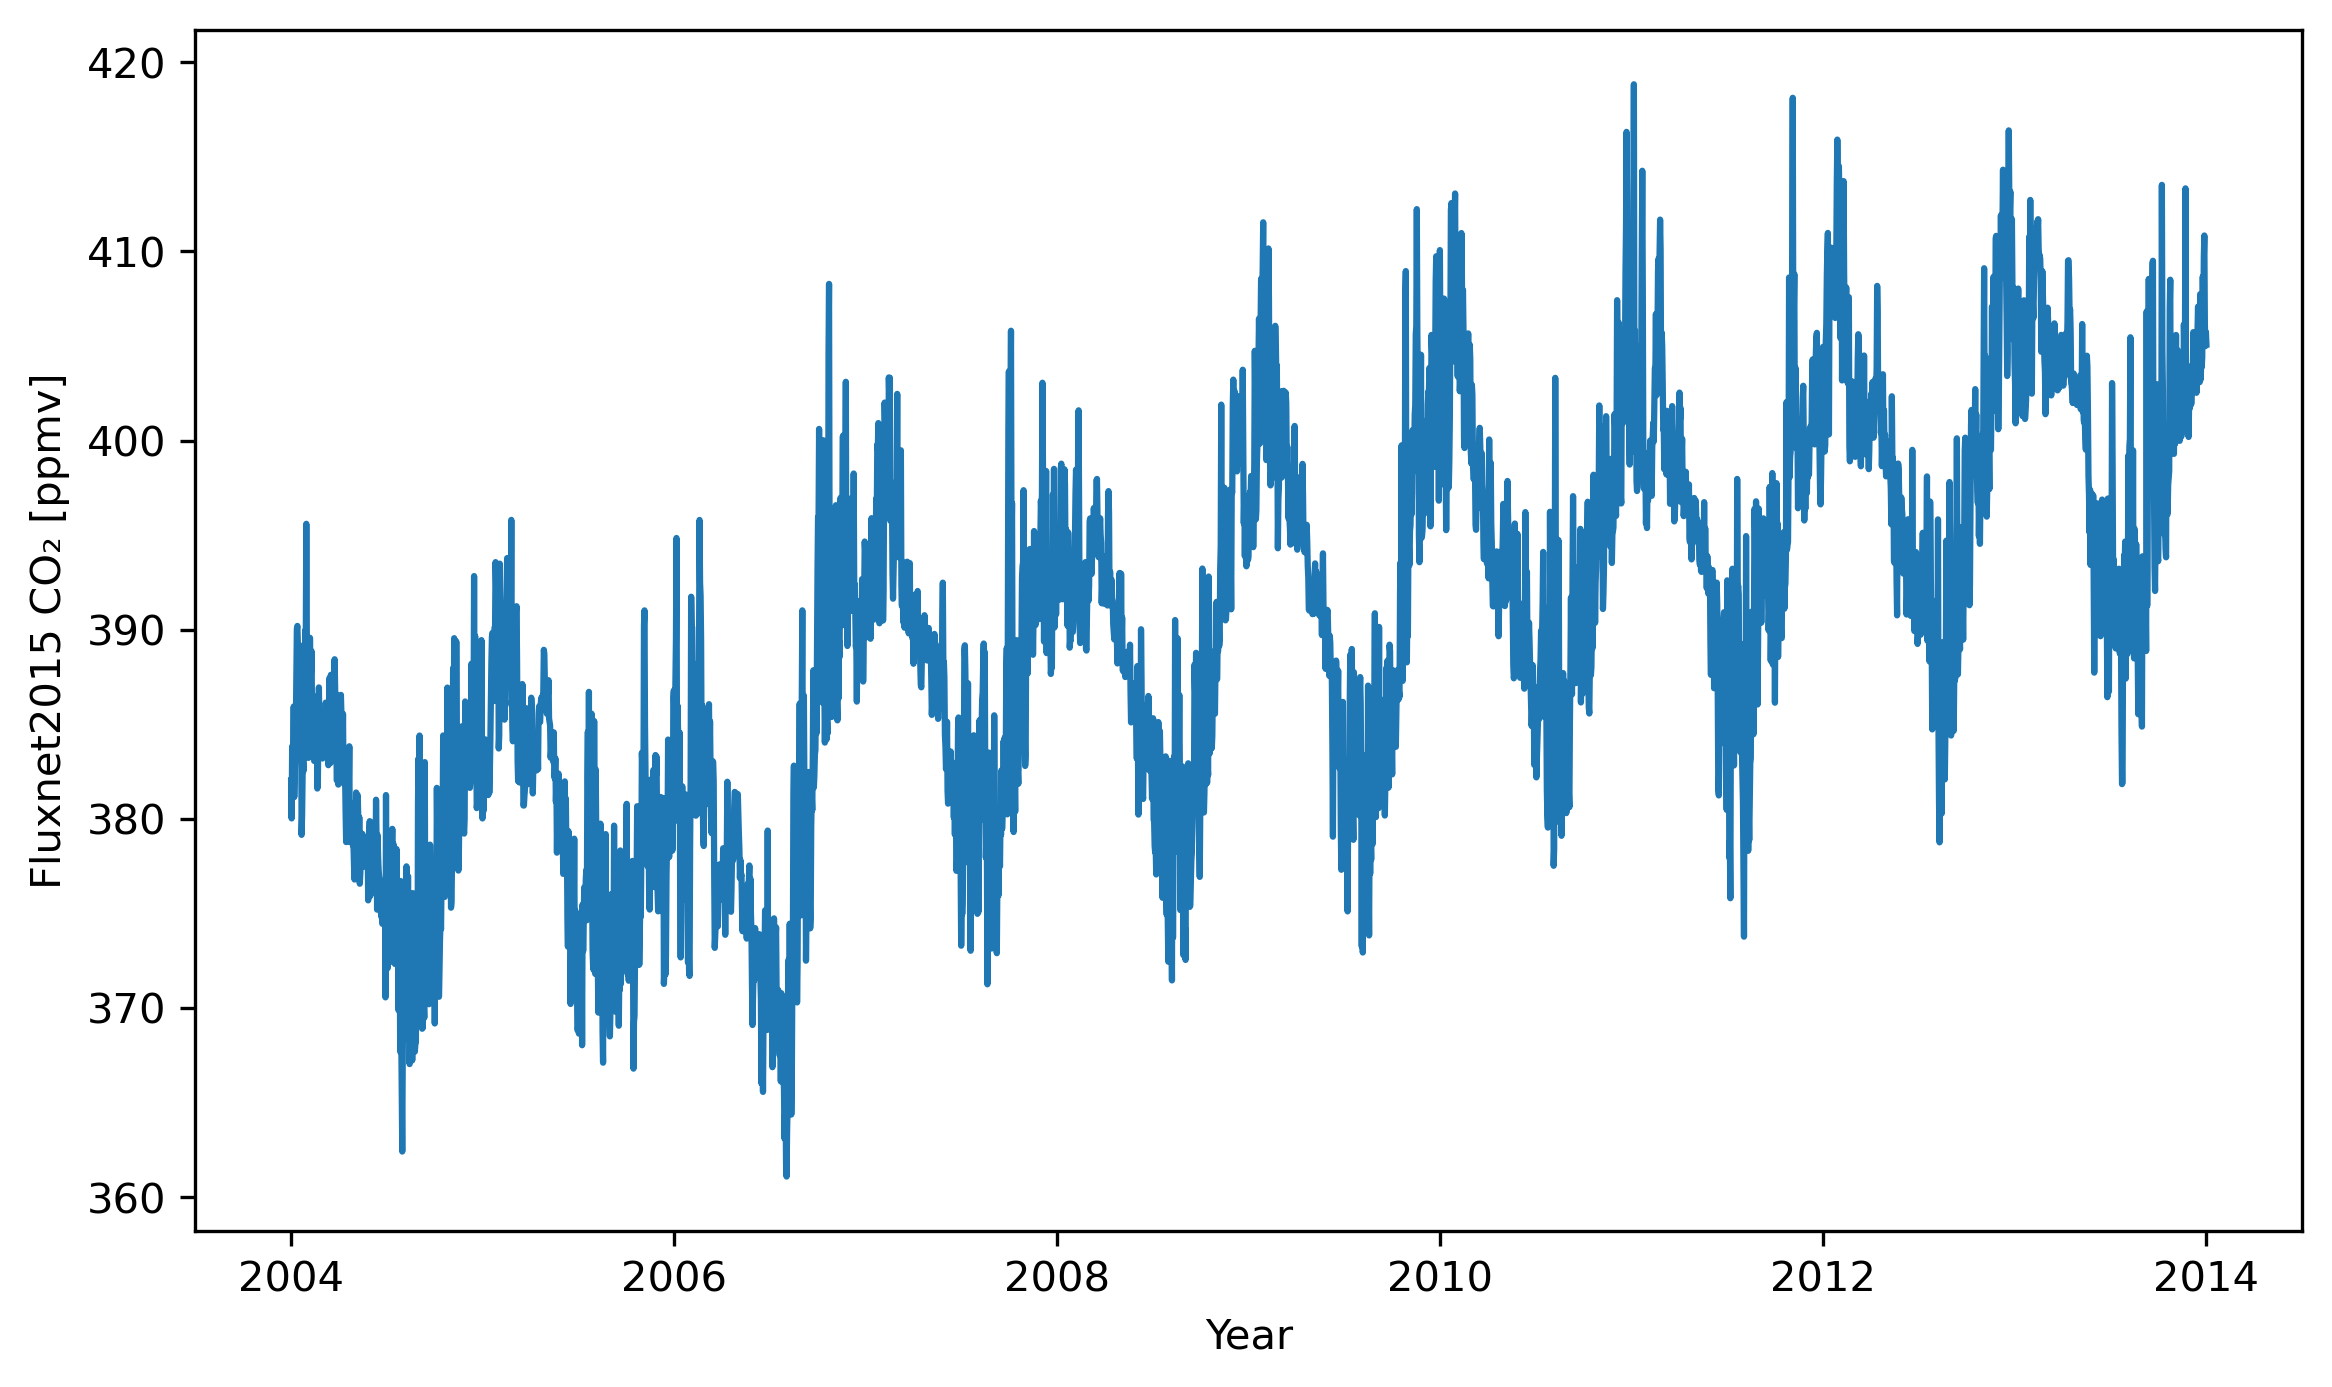

In [116]:
fig, ax = plt.subplots(figsize=(20/2.54, 12/2.54), dpi=300)

co2_na_mask = (simperiod_noleap_clim_data_df["CO2_F_MDS"] == -9999)

ax.plot(
    simperiod_noleap_clim_data_df["TIMESTAMP"].loc[~co2_na_mask],
    simperiod_noleap_clim_data_df["CO2_F_MDS"].loc[~co2_na_mask]
)

ax.set_ylabel("Fluxnet2015 CO₂ [ppmv]")
ax.set_xlabel("Year")

fig.tight_layout()
fig.savefig("../../data/results/obs_data_visualization/HYY_daily_mean_co2.png")

In [79]:
# Calculate mean over period
np.mean(simperiod_noleap_clim_data_df["CO2_F_MDS"].loc[~co2_na_mask])

389.84967460969597